### Goal:

For our case study, we want to utalize supervised machine learning approaches to predict the number of covid cases in several selected countires. What we need is a strong model that predicts the spread of the virus across diffrent countries.

### Plan of actions

1. Analysing covid present in China, Italy, United States and Autralia
2. Analysing covid present on a international level
3. Forecasting the number of covid cases using supervised machine learning models (Linear Regression, Polynomial Regression and Multiple Linear Regression)

In [1]:
# import required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("files/Case_PRB.csv",parse_dates=True)
df = df.fillna(0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'total cases')

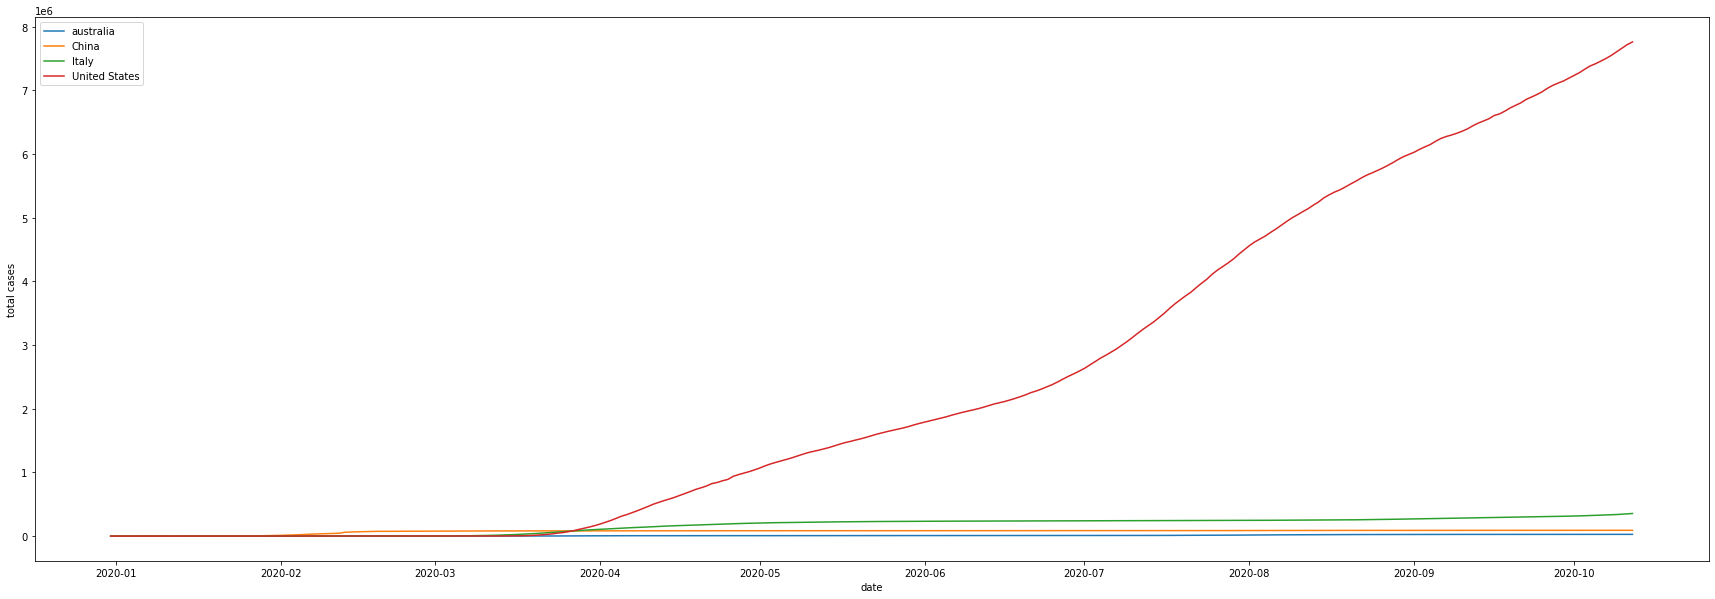

In [3]:
df_australia = df[(df['location'] == "Australia")]
df_china = df[(df['location'] == "China")]
df_italy = df[(df['location'] == "Italy")]
df_usa = df[(df['location'] == "United States")]

plt.rcParams["figure.figsize"] = (30, 10)
plt.plot(pd.to_datetime(df_australia['date']), df_australia['total_cases'], label="australia")
plt.plot(pd.to_datetime(df_china['date']), df_china['total_cases'], label="China")
plt.plot(pd.to_datetime(df_italy['date']), df_italy['total_cases'], label="Italy")
plt.plot(pd.to_datetime(df_usa['date']), df_usa['total_cases'], label="United States")

plt.legend()
plt.xlabel("date")
plt.ylabel("total cases")

Right now the only problem is that we are comparing different country to eachother with each a different population. We have to see this proportionally. We have to make the values "the same"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

Text(0, 0.5, 'total cases')

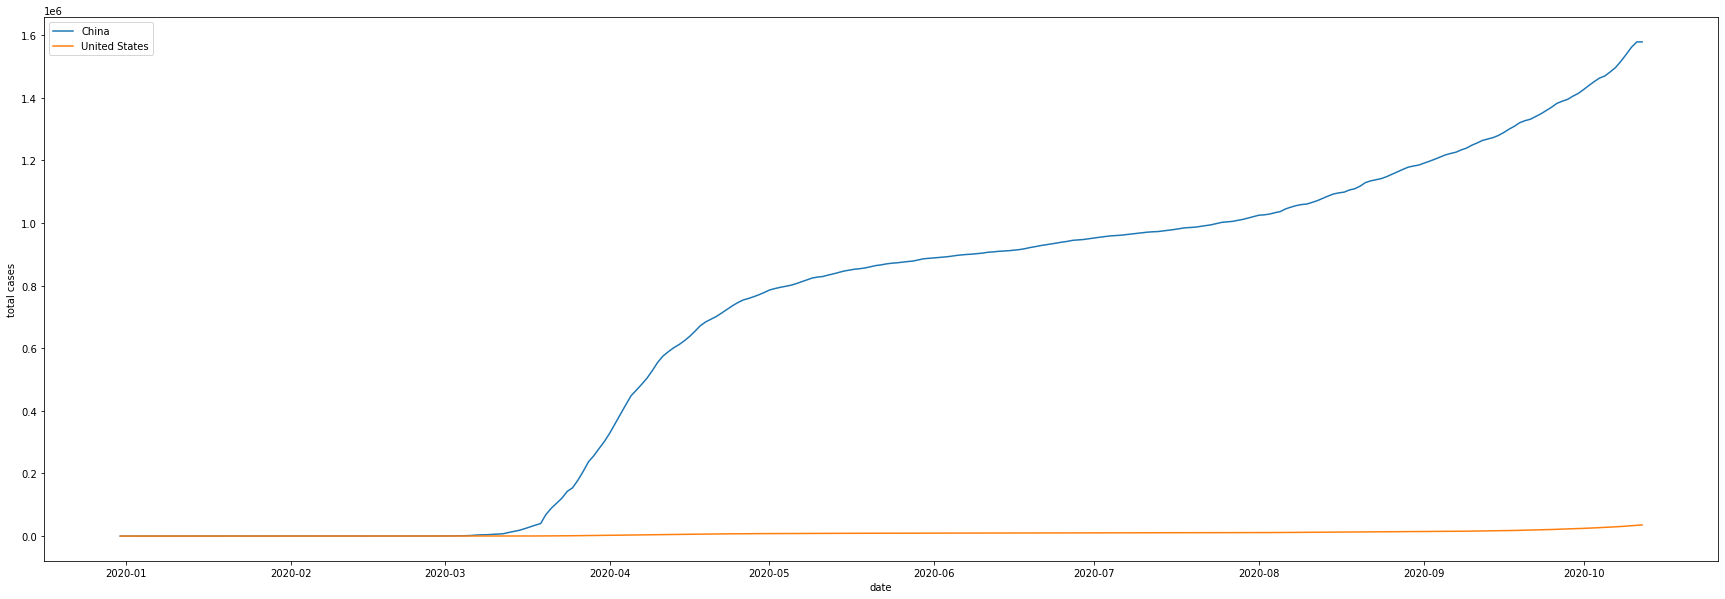

In [55]:
def base_values_on_eachother(df_one, df_two):
  for x in range(0, len(df_one)):
    df_one['total_cases'].iloc[x] = (df_one['population'].iloc[x] / df_two['population'].iloc[x]) * df_two['total_cases'].iloc[x]
    df_two['total_cases'].iloc[x] = (df_two['population'].iloc[x] / df_one['population'].iloc[x]) * df_one['total_cases'].iloc[x]
  
  return df_one, df_two


# For example, lets compare China and the US
df_china = df[(df['location'] == "Germany")]
df_usa = df[(df['location'] == "Netherlands")]

df_china.groupby('total_cases')
df_usa.groupby('total_cases')

df_china, df_usa = base_values_on_eachother(df_china, df_usa)

df_china['total_cases']
plt.rcParams["figure.figsize"] = (30, 10)
plt.plot(pd.to_datetime(df_china['date']), df_china['total_cases'], label="China")
plt.plot(pd.to_datetime(df_usa['date']), df_usa['total_cases'], label="United States")
plt.legend()
plt.xlabel("date")
plt.ylabel("total cases")